In [ ]:
# pip install pymssql
import pymssql
import pandas as pd

pd.options.display.max_columns = None

In [2]:
load_csv = True

In [3]:
if load_csv == True:
    df_sku = pd.read_csv('df_sku.csv')

In [4]:
if load_csv == False:
    sqluser = input('Enter SQL User')
    sqlpass = input(f'Enter Password for {sqluser}')
    ## instance a python db connection object- same form as psycopg2/python-mysql drivers also
    conn = pymssql.connect(server="192.168.254.13", user=sqluser,password=passwrd, port=1433)  # You can lookup the port number inside SQL server. 

    stmt = "SELECT \
            SKU_ID \
            ,UOM_ID \
            ,SalesCategoryID \
            ,cat.CategoryID \
            ,NACSCategoryID \
            ,Category \
            ,Description \
            ,LongDescription \
            ,ShortDescription \
            ,POSDescription \
            FROM AgilityPB.dbo.tbl_SKU sku \
            left outer join Agility_Net.dbo.tbl_Categories cat on sku.SalesCategoryID = cat.CategoryID"
    # Excute Query here
    df_sku = pd.read_sql(stmt,conn)
    df_sku.to_csv('df_sku.csv')

In [5]:
df_sku.head()

,Unnamed: 0,SKU_ID,UOM_ID,SalesCategoryID,CategoryID,NACSCategoryID,Category,Description,LongDescription,ShortDescription,POSDescription
0,0,1,119,40,40,140,General Merchandise,General Merchandise,1000 DRINKING GAMES IN A BOX,1000 DRINK GAME,1000 DRINKING GAMES
1,1,2,119,52,52,91,Salty Snacks,Salty Snacks Inv,2/$1 RED HOT SAUSAGE,MEAT SNACK RH,2/$1 RED HOT SAUSAGE
2,2,3,119,52,52,91,Salty Snacks,Salty Snacks Inv,20 COUNT VARIETY PACK,VARIETY 20CT,20 COUNT VARIETY PACK
3,3,4,119,52,52,91,Salty Snacks,Salty Snacks Inv,26 CT 100 CALORIE VARIETY PACK,VARIETY 100CAL,26CT 100 CALORIE VARIETY
4,4,5,119,52,52,91,Salty Snacks,Salty Snacks Inv,3 CHEESE MEDLEY NIBBLERS,PRETZEL 3 CHEESE,3 CHEESE MEDLEY NIBBLERS


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_sku['LongDescription'], df_sku['Category'], train_size=0.8)

In [26]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(X_train)
features = vec.transform(X_train)

In [71]:
from sklearn.cluster import MiniBatchKMeans
random_state = 0 #for reproducibility
cls = MiniBatchKMeans(n_clusters=29, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=29, n_init=3, random_state=0,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [72]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([ 4,  4, 11, ..., 11,  3,  6])

In [73]:
from sklearn.decomposition import PCA
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

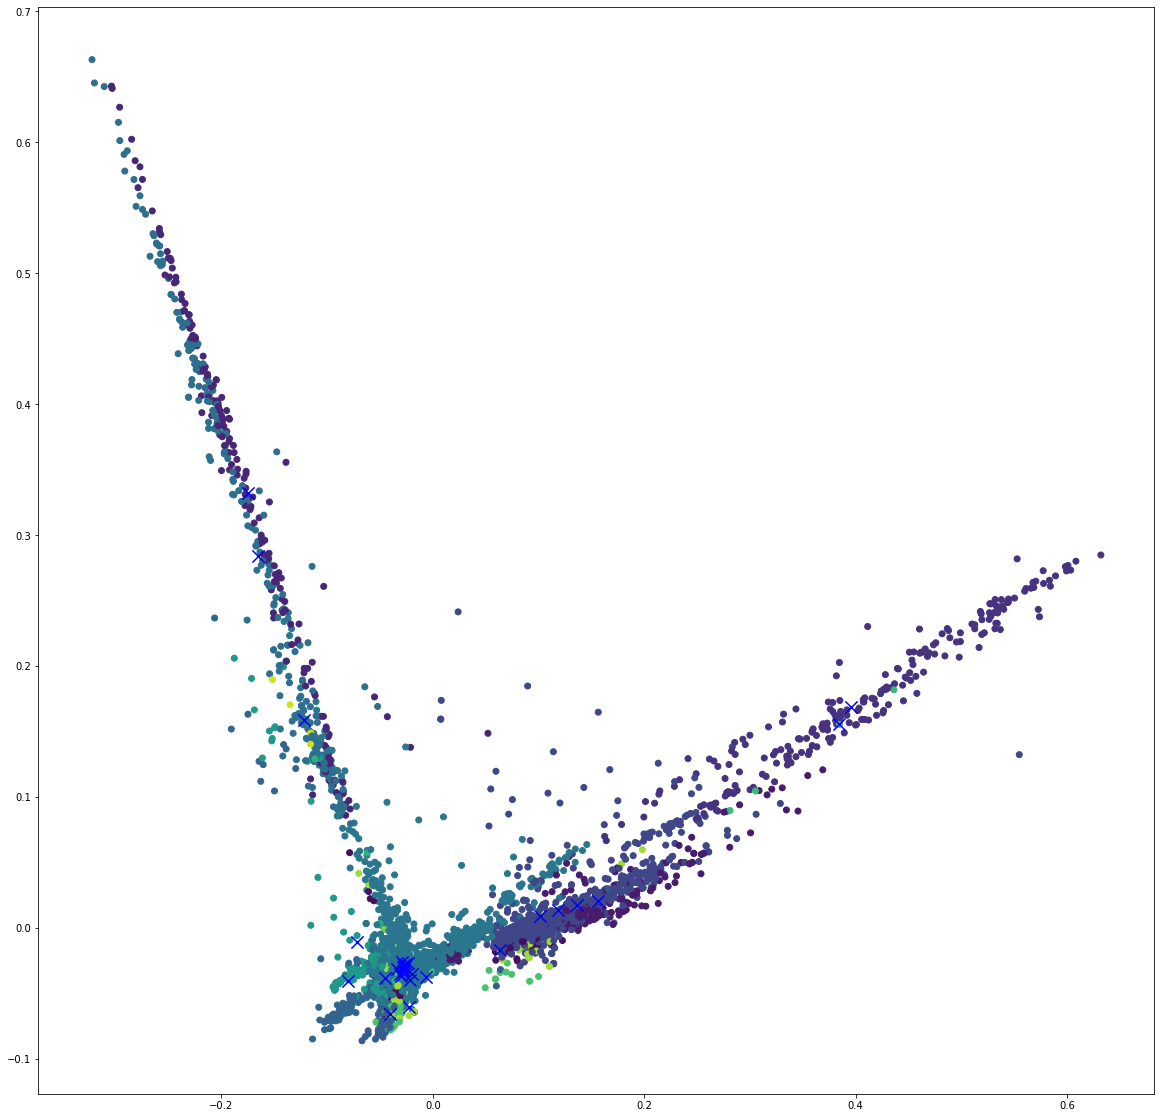

In [74]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(20,20))
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

plt.show()

In [58]:
vec.get_feature_names()

['00',
 '03',
 '08',
 '08z',
 '09',
 '0w20',
 '0z',
 '10',
 '100',
 '1000',
 '100b',
 '100cs',
 '100ct',
 '100ctp1',
 '100mg',
 '100s',
 '100w',
 '10404',
 '104a',
 '10c',
 '10ct',
 '10lb',
 '10ml',
 '10oz',
 '10pk',
 '10w30',
 '10w40',
 '10z',
 '11',
 '1156',
 '1157',
 '11oz',
 '11z',
 '12',
 '120',
 '120ct',
 '123',
 '125',
 '125oz',
 '12fl',
 '12flv',
 '12hr',
 '12mg',
 '12oz',
 '12p',
 '12pc',
 '12pk',
 '12qt',
 '12s',
 '12v',
 '12z',
 '13',
 '135',
 '13g',
 '13z',
 '14',
 '144',
 '144a',
 '14oz',
 '14pc',
 '14z',
 '15',
 '150',
 '150ct',
 '15ct',
 '15lb',
 '15mg',
 '15ml',
 '15oz',
 '15pk',
 '15w40',
 '15z',
 '16',
 '1664',
 '16oz',
 '16pc',
 '16z',
 '17',
 '17oz',
 '17z',
 '18',
 '180',
 '1882',
 '1890',
 '18ct',
 '18m',
 '18mg',
 '18oz',
 '18pk',
 '18z',
 '19',
 '194',
 '1a',
 '1ct',
 '1lt',
 '1oz',
 '1pk',
 '1z',
 '20',
 '200',
 '200ct',
 '200m',
 '200p',
 '20403',
 '20ct',
 '20g',
 '20oz',
 '20ozpet',
 '20w50',
 '20z',
 '21',
 '22',
 '2200ma',
 '22oz',
 '23',
 '2310',
 '23oz',

In [70]:
df_sku.Category.nunique()

29